In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import * 
import matplotlib.pyplot as plt 
from cobra.flux_analysis.loopless import loopless_solution


In [2]:
# Importing the model
model1 = cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")




Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# For getting IDs of all fluxes
# biomass_rxn = model1.reactions.get_by_id("BIOMASS_RT")
# ngam_rxn = model1.reactions.get_by_id("ATPM")
model1.objective =  "ATPM" 
# i = 4
# model.reactions.BIOMASS_RT.bounds = growth_rates[i], growth_rates[i]
# # model.reactions.EX_glc__D_e.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
# medium = model.medium
# medium['EX_glc__D_e'] = glucose_uptakes[i]
# model.medium = medium
solution1 = model1.optimize('minimize')
all_fluxes = solution1.fluxes.to_frame(name='Flux')

In [6]:
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 3.1] 
growth_rates = [0.033713, 0.081992, 0.122398, 0.172112, 0.232267] # calculated when optimized for biomass max and constraining glucose uptake to lab data: [0.035529, 0.080933, 0.118766, 0.171733, 0.232267]
# growth_rates = [0.03, 0.08, 0.12, 0.17, 0.2, 0.23]

all_fluxes_NGAM_min = pd.DataFrame(columns=['Growth rate','Glucose uptake', *all_fluxes.index], index=range(len(glucose_uptakes))) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(glucose_uptakes)):
# i = 0
    model = cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")
    model.objective =  "ATPM" 
    model.reactions.BIOMASS_RT.bounds = growth_rates[i], growth_rates[i]
    model.reactions.EX_glc__D_e.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    # medium = model.medium
    # medium['EX_glc__D_e'] = glucose_uptakes[i]
    # model.medium = medium
    # biomass_rxn.objective_coefficient = 1
    # ngam_rxn.objective_coefficient = -1
    model.optimize('minimize') #
                            # solution = cobra.flux_analysis.pfba(model) # pFBA - but don't know how to minimize
    solution = loopless_solution(model) 


    all_fluxes_NGAM_min.loc[i] = solution.fluxes[['BIOMASS_RT', 'EX_glc__D_e', *all_fluxes.index]].values

all_fluxes_NGAM_min

,Growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,EX_2hxmp_e,SALCNHe,EX_btn_e,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2
0,0.0,-0.476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-2.305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_fluxes_NGAM_min[['ALCD2y', 'HSDy', 'G6PDH2r', 'GLCt1']]
# model.summary()

,ALCD2y,HSDy,G6PDH2r,GLCt1
0,0.0,0.546191,0.0,0.476
1,1.282412,0.0,0.0,1.114
2,2.006889,-0.082859,0.0,1.648
3,5.082353,-0.104091,0.0,2.305
4,6.799168,-0.120749,0.0,3.1


In [7]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_NGAM_min[['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]

for i in range(len(exchange_fluxes_table.columns)):
    exchange_fluxes_table = exchange_fluxes_table.rename(columns = {exchange_fluxes_table.columns[i]: getattr(model.reactions, exchange_fluxes_table.columns[i]).name})

exchange_fluxes_table

,D-Glucose exchange,O2 exchange,Ammonia exchange,Sulfate exchange,Phosphate exchange,CO2 exchange
0,-0.476,-2.856,0.0,0.0,0.0,2.856
1,-1.114,-6.684,0.0,0.0,0.0,6.684
2,-1.648,-9.888,0.0,0.0,0.0,9.888
3,-2.305,-13.83,0.0,0.0,0.0,13.83
4,-3.1,-18.6,0.0,0.0,0.0,18.6


In [ ]:
intracellular_fluxes = all_fluxes_NGAM_min[[ 'ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK', 'FBA', 'PYRDC','PDHm', 'ACITL']]

for i in range(len(intracellular_fluxes.columns)):
    if intracellular_fluxes.columns[i] != 'TKT1' and intracellular_fluxes.columns[i] != 'TKT2':
        intracellular_fluxes = intracellular_fluxes.rename(columns = {intracellular_fluxes.columns[i]: getattr(model.reactions, intracellular_fluxes.columns[i]).name})

# Adding XPK and FPK together
intracellular_fluxes['Xylulose-5-phosphate phosphoketolase'] = intracellular_fluxes['Xylulose-5-phosphate phosphoketolase'] + all_fluxes_NGAM_min['FPK']

# Change G6PDH2rp column name to oxpp 
intracellular_fluxes = intracellular_fluxes.rename(columns = {'Glucose 6-phosphate dehydrogenase': 'oxPPP', 'ATP maintenance requirement': 'NGAM', 'Xylulose-5-phosphate phosphoketolase': 'Phosphoketolase', 
                                                              'TKT1': 'Transketolase 1', 'TKT2': 'Transketolase 2'})
intracellular_fluxes

,NGAM,D-Glucose exchange,oxPPP,Transketolase 1,Transaldolase,Transketolase 2,Phosphoketolase,Fructose-bisphosphate aldolase,Pyruvate decarboxylase,Pyruvate dehydrogenase,ATP-Citrate lyase
0,1.22,-0.476,0.0,-0.076357,-0.307591,0.0,0.181049,0.0,0.015571,0.427715,0.0
1,1.22,-1.114,0.0,-0.185643,-0.704482,0.239139,0.440129,0.0,0.057207,0.940951,0.0
2,1.22,-1.648,0.0,-0.277161,-1.036638,0.0,0.657126,0.0,0.100496,1.374625,0.0
3,1.22,-2.305,0.0,-0.389753,-0.389753,0.0,0.924085,1.055552,0.153738,1.908194,0.0
4,1.22,-3.1,0.0,-0.526051,-0.526051,0.677771,1.247295,1.413706,0.236023,2.562563,0.0


Text(0, 0.5, 'Flux $(g/gDW/h)$')

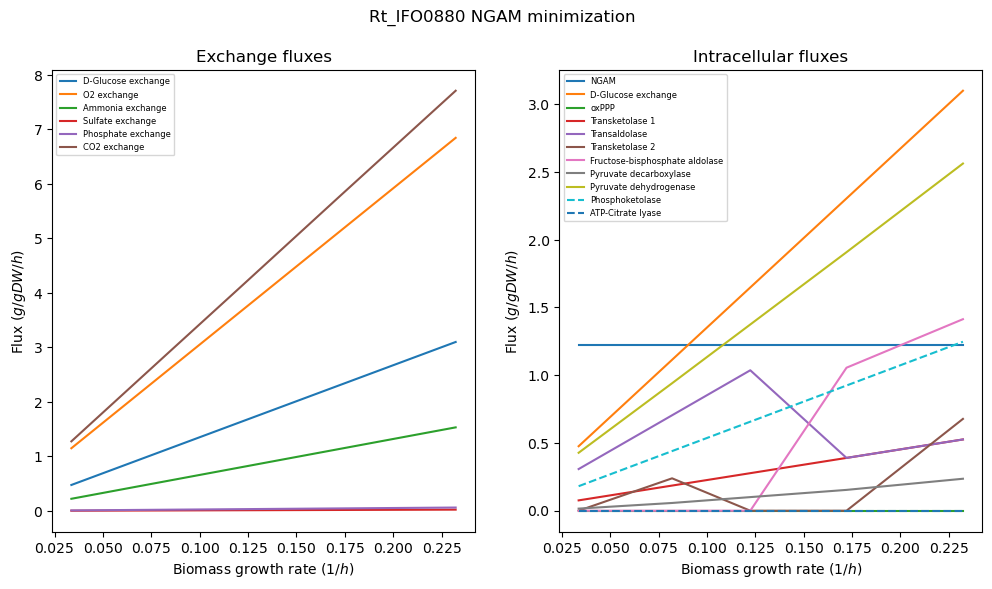

In [ ]:
# Plot exchange and intracellular fluxes
fig, ax = plt.subplots(1, 2, figsize=(12,6)) #, 
fig.suptitle('Rt_IFO0880 NGAM minimization')

# Sample data

x1 = all_fluxes_NGAM_min['BIOMASS_RT']
y1 = np.abs(exchange_fluxes_table)

ax[0].plot(x1, y1, '-', label= y1.columns) #
ax[0].legend(fontsize=6, loc='upper left')
ax[0].set_title("Exchange fluxes") #fluxes biomass maximization
ax[0].set_xlabel('Biomass growth rate $(1/h)$')
ax[0].set_ylabel('Flux $(g/gDW/h)$')

x2 = all_fluxes_NGAM_min['BIOMASS_RT']
y2 = np.abs(intracellular_fluxes.drop(columns = ['Phosphoketolase','ATP-Citrate lyase']))
y3 = np.abs(intracellular_fluxes[['Phosphoketolase','ATP-Citrate lyase']])

ax[1].plot(x2, y2, '-', label= y2.columns) #
ax[1].plot(x2, y3, '--', label= y3.columns) # ACL and phosphoketolase

ax[1].legend(fontsize=6, loc='upper left')
ax[1].set_title("Intracellular fluxes")
ax[1].set_xlabel('Biomass growth rate $(1/h)$')
ax[1].set_ylabel('Flux $(g/gDW/h)$')

See Rt_IFO0880_cofactor_balances file

In [ ]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\Glucose_maximization\\all_fluxes_dif_GR.xlsx') as excel_writer:
#     all_fluxes_dif_GR.to_excel(excel_writer, sheet_name='Glucose uptake range 0.49-3.1', index=True)
    
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\Glucose_maximization\\exchange_fluxes_dif_GR.xlsx') as excel_writer:
#     exchange_fluxes_table_all.to_excel(excel_writer, sheet_name='Exchange fluxes', index=True)

In [ ]:
# # # #  Get csv files
# glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 2.6619851, 3.1]
# i = 2
# all_fluxes_NGAM_min.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_results\\fluxes_NGAM_min_glucose_uptake_{glucose_uptakes[i]}.csv', index=True)
